In [1]:
import pandas as pd
import numpy as np

In [2]:
filePath_train = "Data/Downloads/LoanData/LoanStats_securev1_2016Q4.csv"
loan_data = pd.read_csv(filePath_train, skiprows = 1, parse_dates = True)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,96191765,NaN,9300.0,9300.0,9300.0,36 months,8.24%,292.46,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,95147276,NaN,4500.0,4500.0,4500.0,36 months,12.74%,151.06,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96419283,NaN,14400.0,14400.0,14400.0,60 months,7.99%,291.92,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96419273,NaN,21500.0,21500.0,21500.0,36 months,11.39%,707.86,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,95666486,NaN,11100.0,11100.0,11100.0,36 months,5.32%,334.28,A,A1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_data.shape

(103548, 128)

In [5]:
# regex for matching n number of white spaces = ^[ \t]+$ and converting to NANs
loan_data = loan_data.replace(r'^[ \t]+$', np.nan, regex=True)
loan_data = loan_data.replace("n/a", np.nan, regex=False)

In [6]:
# Remove Unwanted Columns
columnsToRemove = ['emp_title', 'url', 'desc', 'title', 'zip_code', 'application_type',
                   'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'revol_bal_joint',
                  'grade', 'sub_grade' ,'last_credit_pull_d', 'policy_code', 'collections_12_mths_ex_med', 
                  'id' ,'recoveries', 'collection_recovery_fee', 'issue_d', 'loan_status',  'pymnt_plan' ,'last_pymnt_d',
                   'funded_amnt' ,'funded_amnt_inv' , 'installment'  ,'out_prncp', 'out_prncp_inv', 
                   'total_pymnt' ,'total_pymnt_inv' ,'total_rec_prncp' ,'total_rec_int' ,'total_rec_late_fee' ,
                   'last_pymnt_amnt', 'last_fico_range_high' , 'last_fico_range_low' , 'tot_coll_amt', 'tot_cur_bal',
                   'earliest_cr_line']
# Justification
#'emp_title', 'url', 'desc', 'title' are very subjective and will not be used in analysis
# 'zipcode' is in format 456xx, which is not of very much use because we have a column for states
# 'application_type','annual_inc_joint', 'dti_joint',
#                    'verification_status_joint', 'revol_bal_joint' --> assuming all loans to be for single applicatint
# grade & sub_grade (LC assigned), last_credit_pull_d (date last pulled by lending club)
# policy_code (only one value) , collections_12_mths_ex_med (Number of collections in 12 months excluding medical collections)
# id (not needed for regression model) , recoveries (can get only after loan is chargedoff), collection_recovery_fee (can get only after loan is chargedoff)
# can get only after loan is issued --> issue_d, loan_status, pymnt_plan, last_pymnt_d, 'funded_amnt' ,'funded_amnt_inv' ,
#                                         'installment'  ,'out_prncp', 'out_prncp_inv', 'total_pymnt' ,'total_pymnt_inv',
#                                         'total_rec_prncp' ,'total_rec_int' ,'total_rec_late_fee', 'last_pymnt_amnt', 
#                                         'last_fico_range_high' , 'last_fico_range_low' , 'tot_coll_amt', 'tot_cur_bal'

loan_data.drop(columnsToRemove, axis =1, inplace = True)

# Remove Columns with all null values
loan_data.dropna(axis=1, how='all', thresh= 96000, inplace=True)

In [7]:
loan_data.shape

(103548, 69)

In [8]:
# Remove rows with null values
loan_data.dropna(axis=0, how='any', inplace=True)

In [9]:
loan_data.shape

(88129, 69)

In [10]:
# get data types of each column and null values
dataTypes = loan_data.dtypes
dataTypes = pd.Series(dataTypes, name='dataTypes')
missingValues = loan_data.apply(lambda x: sum(x.isnull().values), axis = 0)
missingValues = pd.Series(missingValues, name='missingValues')

# combine datatypes and missing values
dataTypes_and_missingValues = pd.concat([dataTypes, missingValues], axis=1).reset_index()

# get unique values of categorical variables (Although this should be done when exploring the data 
#     in excel or tableau or trifacta or any other exploratory tool)

unqiueValues = []
for col in loan_data:
    unqiueValues.append((col, loan_data[col].unique(), loan_data[col].unique().size))
    
unqiueValues = pd.DataFrame(unqiueValues, columns=('index', 'unqiueValues', 'countOfUniqueVal'))

# Combine datatypes, missing values, unqiue values and count of unique values
# column_details =  pd.join([dataTypes_and_missingValues, unqiueValues], axis=1, join_axes=)
column_details = dataTypes_and_missingValues.join(unqiueValues.set_index('index'), on='index')
column_details

,index,dataTypes,missingValues,unqiueValues,countOfUniqueVal
0,loan_amnt,float64,0,"[9300.0, 4500.0, 14400.0, 21500.0, 11100.0, 10...",1467
1,term,object,0,"[ 36 months, 60 months]",2
2,int_rate,object,0,"[ 8.24%, 12.74%, 7.99%, 11.39%, 5.32%, ...",57
3,emp_length,object,0,"[9 years, 6 years, 10+ years, 3 years, < 1 yea...",11
4,home_ownership,object,0,"[MORTGAGE, RENT, OWN, ANY]",4
5,annual_inc,float64,0,"[62000.0, 32000.0, 135000.0, 125000.0, 60000.0...",6501
6,verification_status,object,0,"[Source Verified, Not Verified, Verified]",3
7,purpose,object,0,"[debt_consolidation, credit_card, home_improve...",13
8,addr_state,object,0,"[MI, WI, NJ, OK, CA, LA, IN, FL, CT, OH, KS, M...",49
9,dti,float64,0,"[16.12, 29.93, 6.6, 20.18, 18.91, 32.94, 16.24...",4048


In [11]:
loan_data.describe(include='all', percentiles=[.25,.50,.75])

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,88129.000000,88129,88129,88129,88129,8.812900e+04,88129,88129,88129,88129.000000,...,88129.000000,88129.000000,88129.000000,88129.000000,88129.000000,88129.000000,8.812900e+04,8.812900e+04,88129.00000,8.812900e+04
unique,NaN,2,57,11,4,NaN,3,13,49,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,36 months,11.49%,10+ years,MORTGAGE,NaN,Source Verified,debt_consolidation,CA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,66792,6908,32667,43704,NaN,37490,50818,11714,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,14376.344052,NaN,NaN,NaN,NaN,8.316877e+04,NaN,NaN,NaN,19.068718,...,0.094248,2.145718,93.299972,41.891719,0.144686,0.077829,1.858010e+05,5.579882e+04,22563.44251,4.931001e+04
std,9299.334810,NaN,NaN,NaN,NaN,7.964957e+04,NaN,NaN,NaN,59.018040,...,0.568110,1.890398,9.629459,36.298376,0.397605,0.450721,1.847304e+05,5.295838e+04,21947.59837,4.761014e+04
min,1000.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+03,0.000000e+00,100.00000,0.000000e+00
25%,7200.000000,NaN,NaN,NaN,NaN,5.000000e+04,NaN,NaN,NaN,12.610000,...,0.000000,1.000000,90.000000,0.000000,0.000000,0.000000,5.540900e+04,2.354200e+04,8400.00000,1.951500e+04
50%,12000.000000,NaN,NaN,NaN,NaN,7.000000e+04,NaN,NaN,NaN,18.270000,...,0.000000,2.000000,96.800000,33.300000,0.000000,0.000000,1.217410e+05,4.126100e+04,16000.00000,3.722800e+04
75%,20000.000000,NaN,NaN,NaN,NaN,9.960000e+04,NaN,NaN,NaN,24.490000,...,0.000000,3.000000,100.000000,66.700000,0.000000,0.000000,2.662080e+05,6.995500e+04,29300.00000,6.501600e+04


In [12]:
column_details.query("missingValues > 0")

,index,dataTypes,missingValues,unqiueValues,countOfUniqueVal


In [13]:
column_details.query("countOfUniqueVal < 10")

,index,dataTypes,missingValues,unqiueValues,countOfUniqueVal
1,term,object,0,"[ 36 months, 60 months]",2
4,home_ownership,object,0,"[MORTGAGE, RENT, OWN, ANY]",4
6,verification_status,object,0,"[Source Verified, Not Verified, Verified]",3
13,inq_last_6mths,float64,0,"[1.0, 0.0, 2.0, 3.0, 4.0, 5.0]",6
19,initial_list_status,object,0,"[w, f]",2
20,acc_now_delinq,float64,0,"[0.0, 1.0, 2.0, 4.0, 3.0, 6.0]",6
39,chargeoff_within_12_mths,float64,0,"[0.0, 1.0, 2.0, 7.0, 3.0, 4.0, 5.0]",7
57,num_tl_120dpd_2m,float64,0,"[0.0, 1.0, 2.0]",3
58,num_tl_30dpd,float64,0,"[0.0, 1.0, 2.0, 3.0]",4
63,pub_rec_bankruptcies,float64,0,"[1.0, 0.0, 2.0, 5.0, 3.0, 4.0, 6.0, 7.0, 8.0]",9


In [14]:
# Converting column values to numeric categories
def normalize_categorical_features(data_frame, col_name, oldValue, newValue):
#     dummy_df = pd.get_dummies(loan_data[col_name])
#     loan_data = loan_data.join(dummy_df)
    data_frame.loc[(data_frame[col_name] == oldValue), [col_name]] = newValue
    return data_frame

In [15]:
# Feature Engineering
loan_data = normalize_categorical_features(loan_data, "term", " 36 months", "1")
loan_data = normalize_categorical_features(loan_data, "term", " 60 months", "2")
loan_data.term = loan_data.term.astype(int)

loan_data = normalize_categorical_features(loan_data, "home_ownership", "MORTGAGE", "1")
loan_data = normalize_categorical_features(loan_data, "home_ownership", "RENT", "2")
loan_data = normalize_categorical_features(loan_data, "home_ownership", "OWN", "3")
loan_data = normalize_categorical_features(loan_data, "home_ownership", "ANY", "4")
loan_data.home_ownership = loan_data.home_ownership.astype(int)

loan_data = normalize_categorical_features(loan_data, "verification_status", "Source Verified", "1")
loan_data = normalize_categorical_features(loan_data, "verification_status", "Not Verified", "2")
loan_data = normalize_categorical_features(loan_data, "verification_status", "Verified", "3")
loan_data.verification_status = loan_data.verification_status.astype(int)

loan_data = normalize_categorical_features(loan_data, "initial_list_status", "w", "1")
loan_data = normalize_categorical_features(loan_data, "initial_list_status", "f", "2")
loan_data.initial_list_status = loan_data.initial_list_status.astype(int)

# Another Way to do this is by using factorize method --> levels are the unique values and labels are the values for each record

# labels,levels = pd.factorize(loan_data.PaymentMethod)
# loan_data.PaymentMethod = labels

In [16]:
loan_data.int_rate.replace(to_replace=r'(%| )', value="", inplace=True, limit=None, regex=True, axis=None)
loan_data.int_rate = loan_data.int_rate.astype(float)

In [17]:
loan_data.emp_length.replace(to_replace="< 1 year", value="0", inplace=True, limit=None, regex=False, axis=None)
loan_data.emp_length.replace(to_replace=r'([a-zA-Z +])', value="", inplace=True, limit=None, regex=True, axis=None)
loan_data.emp_length = loan_data.emp_length.astype(int)

In [18]:
purposeLabels,purposeLevels = pd.factorize(loan_data.purpose)
loan_data.purpose = purposeLabels

In [19]:
addr_stateLabels,addr_stateLevels = pd.factorize(loan_data.addr_state)
loan_data.addr_state = addr_stateLabels

In [20]:
loan_data.revol_util.replace(to_replace=r'(%| )', value="", inplace=True, limit=None, regex=True, axis=None)
loan_data.revol_util = loan_data.revol_util.astype(float)

In [21]:
loan_data.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,9300.0,1,8.24,9,1,62000.0,1,0,0,16.12,...,0.0,2.0,96.0,50.0,1.0,0.0,279452.0,36995.0,5000.0,33608.0
1,4500.0,1,12.74,6,2,32000.0,2,1,1,29.93,...,0.0,3.0,100.0,0.0,0.0,0.0,39781.0,25255.0,3500.0,29681.0
2,14400.0,2,7.99,9,1,135000.0,2,2,2,6.60,...,1.0,1.0,88.9,42.9,0.0,0.0,123895.0,111622.0,21600.0,100895.0
3,21500.0,1,11.39,10,1,125000.0,2,0,3,20.18,...,0.0,1.0,100.0,100.0,0.0,0.0,346552.0,66847.0,47600.0,52052.0
4,11100.0,1,5.32,3,2,60000.0,2,1,4,18.91,...,0.0,0.0,91.3,0.0,0.0,0.0,104060.0,67344.0,59400.0,39360.0


In [22]:
# Exploring Data
# loan_data[loan_data.columns[1:9]].describe(include='all')

dataTypes = loan_data.dtypes
dataTypes = pd.Series(dataTypes, name='dataTypes')
missingValues = loan_data.apply(lambda x: sum(x.isnull().values), axis = 0)
missingValues = pd.Series(missingValues, name='missingValues')

# combine datatypes and missing values
dataTypes_and_missingValues = pd.concat([dataTypes, missingValues], axis=1).reset_index()

# get unique values of categorical variables (Although this should be done when exploring the data 
#     in excel or tableau or trifacta or any other exploratory tool)

unqiueValues = []
for col in loan_data:
    unqiueValues.append((col, loan_data[col].unique(), loan_data[col].unique().size))
    
unqiueValues = pd.DataFrame(unqiueValues, columns=('index', 'unqiueValues', 'countOfUniqueVal'))

# Combine datatypes, missing values, unqiue values and count of unique values
# column_details =  pd.join([dataTypes_and_missingValues, unqiueValues], axis=1, join_axes=)
column_details = dataTypes_and_missingValues.join(unqiueValues.set_index('index'), on='index')
column_details

,index,dataTypes,missingValues,unqiueValues,countOfUniqueVal
0,loan_amnt,float64,0,"[9300.0, 4500.0, 14400.0, 21500.0, 11100.0, 10...",1467
1,term,int32,0,"[1, 2]",2
2,int_rate,float64,0,"[8.24, 12.74, 7.99, 11.39, 5.32, 13.49, 11.44,...",57
3,emp_length,int32,0,"[9, 6, 10, 3, 0, 5, 2, 8, 7, 1, 4]",11
4,home_ownership,int32,0,"[1, 2, 3, 4]",4
5,annual_inc,float64,0,"[62000.0, 32000.0, 135000.0, 125000.0, 60000.0...",6501
6,verification_status,int32,0,"[1, 2, 3]",3
7,purpose,int64,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",13
8,addr_state,int64,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",49
9,dti,float64,0,"[16.12, 29.93, 6.6, 20.18, 18.91, 32.94, 16.24...",4048


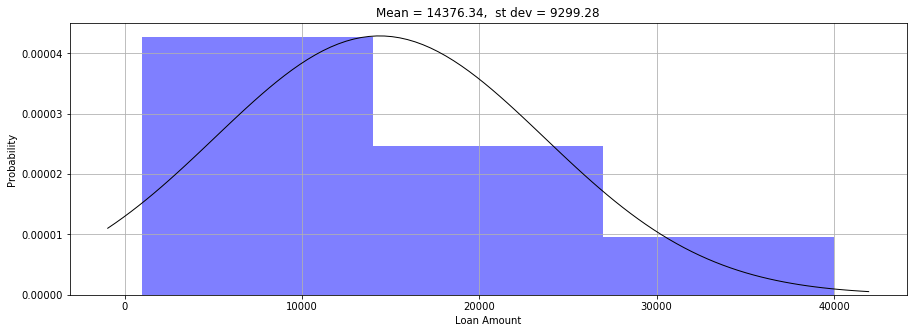

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm



data = loan_data.loan_amnt

mu_loan_amount, std_loan_amount = norm.fit(data)
plt.figure(figsize=(15,5))
numOfBins = 3
n , loanAmountBins, patches = plt.hist(data, bins=numOfBins, range=None, histtype='bar', normed = True, align='mid',  log=False, color="Blue", alpha = .5, 
         label="None", stacked=False)

# For overlaying normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_loan_amount, std_loan_amount)
plt.plot(x, p, 'k', linewidth=1)
title = "Mean = %.2f,  st dev = %.2f" % (mu_loan_amount, std_loan_amount)
plt.title(title)
plt.grid(True)
plt.xlabel('Loan Amount')
plt.ylabel('Probability')
# Overlaying mean, 68 percentile, 95 percentile and 99.7 percentiles
# percentileLines = [(mu-(2*std)), (mu-std), mu,(mu+std), (mu+(2*std))]


plt.savefig('Data/Graphs/histogram_loan_Amount.png')
plt.show()

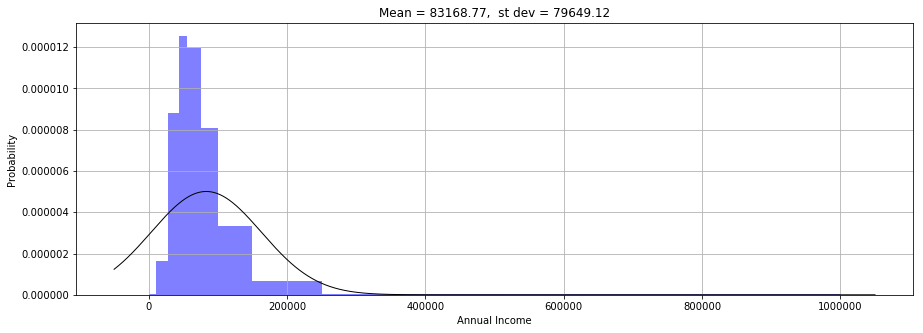

In [24]:
data = loan_data.annual_inc

mu_annual_inc, std_annual_inc = norm.fit(data)
plt.figure(figsize=(15,5))
numOfBins = [0,10000, 28000, 44000, 55000, 75000, 100000, 150000, 250000, 1000000]
# numOfBins = None
n , annual_inc_Bins, patches = plt.hist(data, bins=numOfBins, range=(None), histtype='bar', 
                                        normed = True, align='mid',  log=False, color="Blue",
                                        alpha = .5, label="None", stacked=False)

# For overlaying normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 10000)
p = norm.pdf(x, mu_annual_inc, std_annual_inc)
plt.plot(x, p, 'k', linewidth=1)
title = "Mean = %.2f,  st dev = %.2f" % (mu_annual_inc, std_annual_inc)
plt.title(title)
plt.grid(True)
plt.xlabel('Annual Income')
plt.ylabel('Probability')
# Overlaying mean, 68 percentile, 95 percentile and 99.7 percentiles
# percentileLines = [(mu-(2*std)), (mu-std), mu,(mu+std), (mu+(2*std))]


plt.savefig('Data/Graphs/histogram_annual_income.png')
plt.show()

In [25]:
annual_inc_Bins

array([      0,   10000,   28000,   44000,   55000,   75000,  100000,
        150000,  250000, 1000000])

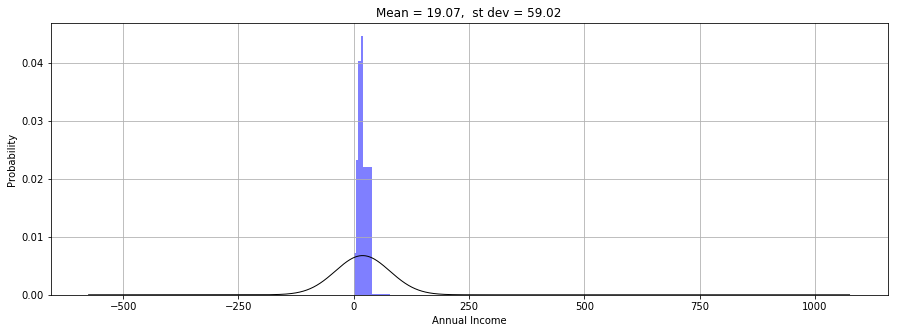

In [26]:
data = loan_data.dti

mu_dti, std_dti = norm.fit(data)
plt.figure(figsize=(15,5))
numOfBins = [-500,0, 5, 10, 15, 19,40, 55, 78, 137, 1000]
n , dti_Bins, patches = plt.hist(data, bins=numOfBins, range=(0,250), histtype='bar', 
                                        normed = True, align='mid',  log=False, color="Blue",
                                        alpha = .5, label="None", stacked=False)

# For overlaying normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 10000)
p = norm.pdf(x, mu_dti, std_dti)
plt.plot(x, p, 'k', linewidth=1)
title = "Mean = %.2f,  st dev = %.2f" % (mu_dti, std_dti)
plt.title(title)
plt.grid(True)
plt.xlabel('Annual Income')
plt.ylabel('Probability')
# Overlaying mean, 68 percentile, 95 percentile and 99.7 percentiles
# percentileLines = [(mu-(2*std)), (mu-std), mu,(mu+std), (mu+(2*std))]


plt.savefig('Data/Graphs/histogram_dti.png')
plt.show()

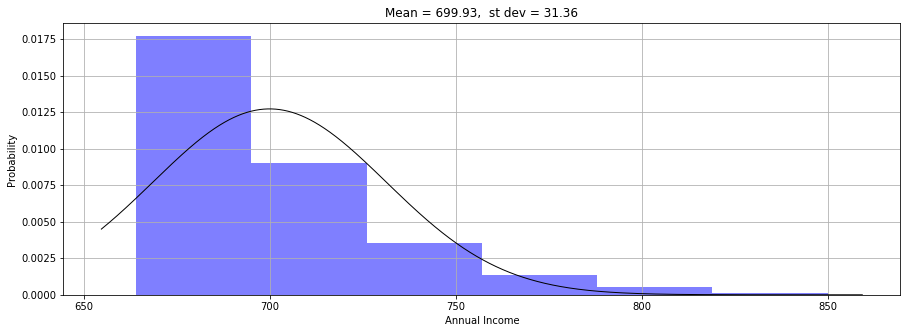

In [27]:
data = loan_data.fico_range_high

mu_fico_range_high, std_fico_range_high = norm.fit(data)
plt.figure(figsize=(15,5))
numOfBins = 6
n , fico_high_Bins, patches = plt.hist(data, bins=numOfBins, range=(None), histtype='bar', 
                                        normed = True, align='mid',  log=False, color="Blue",
                                        alpha = .5, label="None", stacked=False)

# For overlaying normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 10000)
p = norm.pdf(x, mu_fico_range_high, std_fico_range_high)
plt.plot(x, p, 'k', linewidth=1)
title = "Mean = %.2f,  st dev = %.2f" % (mu_fico_range_high, std_fico_range_high)
plt.title(title)
plt.grid(True)
plt.xlabel('Annual Income')
plt.ylabel('Probability')
# Overlaying mean, 68 percentile, 95 percentile and 99.7 percentiles
# percentileLines = [(mu-(2*std)), (mu-std), mu,(mu+std), (mu+(2*std))]


plt.savefig('Data/Graphs/histogram_fico_high.png')
plt.show()

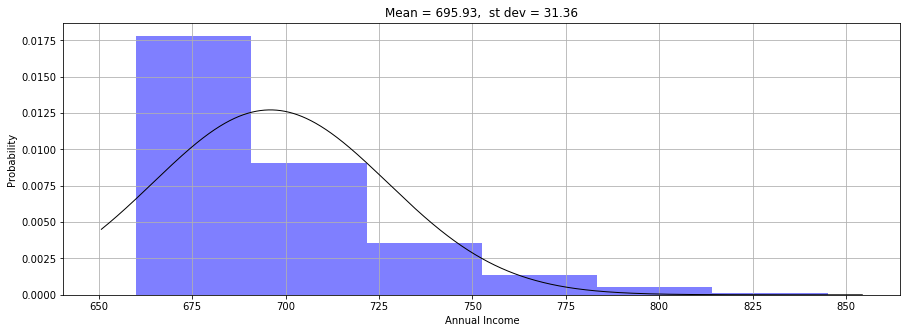

In [28]:
data = loan_data.fico_range_low

mu_fico_range_low, std_fico_range_low = norm.fit(data)
plt.figure(figsize=(15,5))
numOfBins = 6
n , fico_low_Bins, patches = plt.hist(data, bins=numOfBins, range=(None), histtype='bar', 
                                        normed = True, align='mid',  log=False, color="Blue",
                                        alpha = .5, label="None", stacked=False)

# For overlaying normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 10000)
p = norm.pdf(x, mu_fico_range_low, std_fico_range_low)
plt.plot(x, p, 'k', linewidth=1)
title = "Mean = %.2f,  st dev = %.2f" % (mu_fico_range_low, std_fico_range_low)
plt.title(title)
plt.grid(True)
plt.xlabel('Annual Income')
plt.ylabel('Probability')
# Overlaying mean, 68 percentile, 95 percentile and 99.7 percentiles
# percentileLines = [(mu-(2*std)), (mu-std), mu,(mu+std), (mu+(2*std))]


plt.savefig('Data/Graphs/histogram_fico_low.png')
plt.show()

In [29]:
# # Feature Engineering
# # Putting continuos variables in custom buckets

# # Define the buckets with function range(start, stop, step)
# mybins = range(0, loan_data.tenure.max(), 10)

# # Cut the data with the help of the bins
# loan_data['tenure_bucket'] = pd.cut(loan_data.tenure, bins=mybins)

# # Count the number of values per bucket
# loan_data['tenure_bucket'].value_counts()

# # Label the buckets
# labels,levels = pd.factorize(loan_data.tenure_bucket)
# loan_data.tenure_bucket = labels


# # ________________________________
# # Range for float value
# import decimal

# def drange(x, y, jump):
#     while (x < y):
#         yield float(x)
#         x += decimal.Decimal(jump)
# # ________________________________
    
# # Same for monthly charges

# mybins2 = list(drange(0, loan_data.MonthlyCharges.max(), 10.0))[-1]
# loan_data['MonthlyCharges_bucket'] = pd.cut(loan_data.MonthlyCharges, bins=mybins2)
# loan_data['MonthlyCharges_bucket'].value_counts()
# labels,levels = pd.factorize(loan_data.MonthlyCharges_bucket)
# loan_data.MonthlyCharges_bucket = labels

# # Same for total charges
# mybins3 = list(drange(0, loan_data.TotalCharges.max(), 1.0))[-1]
# loan_data['TotalCharges_bucket'] = pd.cut(loan_data.TotalCharges, bins=mybins3)
# loan_data['TotalCharges_bucket'].value_counts()
# labels,levels = pd.factorize(loan_data.TotalCharges_bucket)
# loan_data.TotalCharges_bucket = labels



In [30]:
# Removing Outliers
# --> Putting in another dataframe and removing All datapoints where annual_inc, dti, fico_high, fico_low and loan_amount lies outside of 3 standard deviations of mean

loan_data['outlier_flag'] = 0

loan_data.loc[loan_data['loan_amnt'] > (mu_annual_inc+ (3*std_annual_inc)), 'outlier_flag'] = 1
loan_data.loc[loan_data['annual_inc'] > (mu_annual_inc+ (3*std_annual_inc)), 'outlier_flag'] = 1
loan_data.loc[loan_data['dti'] > (mu_dti+ (3*std_dti)), 'outlier_flag'] = 1
loan_data.loc[loan_data['fico_range_high'] > (mu_fico_range_high+ (3*std_fico_range_high)), 'outlier_flag'] = 1
loan_data.loc[loan_data['fico_range_low'] > (mu_fico_range_low+ (3*std_fico_range_low)), 'outlier_flag'] = 1

loan_data.loc[loan_data['loan_amnt'] <= 0, 'outlier_flag'] = 1
loan_data.loc[loan_data['annual_inc'] <= 0, 'outlier_flag'] = 1
loan_data.loc[loan_data['dti'] <= 0, 'outlier_flag'] = 1
loan_data.loc[loan_data['fico_range_high'] < (mu_fico_range_high- (3*std_fico_range_high)), 'outlier_flag'] = 1
loan_data.loc[loan_data['fico_range_low'] < (mu_fico_range_low- (3*std_fico_range_low)), 'outlier_flag'] = 1


In [31]:
outliers = loan_data.query("outlier_flag == 1")

In [32]:
loan_data = loan_data.query("outlier_flag == 0")

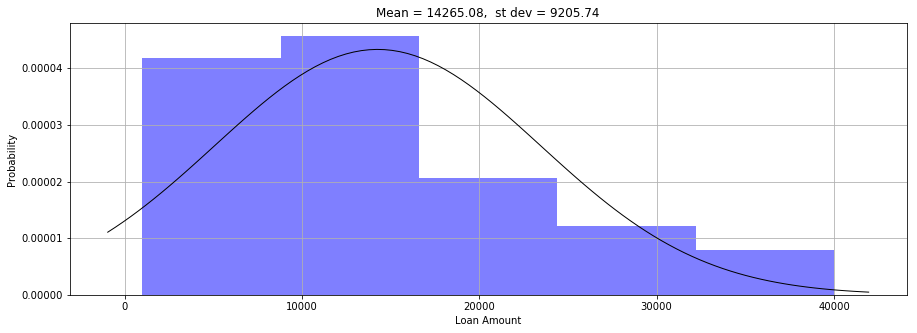

In [33]:
data = loan_data.loan_amnt

mu, std = norm.fit(data)
plt.figure(figsize=(15,5))
numOfBins = 5
n , loanAmountBins, patches = plt.hist(data, bins=numOfBins, range=None, histtype='bar', normed = True, align='mid',  log=False, color="Blue", alpha = .5, 
         label="None", stacked=False)

# For overlaying normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
title = "Mean = %.2f,  st dev = %.2f" % (mu, std)
plt.title(title)
plt.grid(True)
plt.xlabel('Loan Amount')
plt.ylabel('Probability')
# Overlaying mean, 68 percentile, 95 percentile and 99.7 percentiles
percentileLines = [(mu-(2*std)), (mu-std), mu,(mu+std), (mu+(2*std))]


plt.savefig('Data/Graphs/histogram_loan_Amount_2.png')
plt.show()

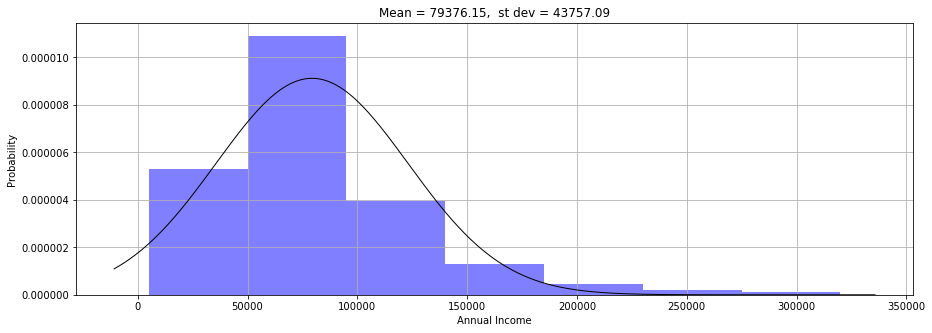

In [34]:
data = loan_data.annual_inc

mu_annual_inc, std_annual_inc = norm.fit(data)
plt.figure(figsize=(15,5))
numOfBins = 7
# numOfBins = None
n , annual_inc_Bins, patches = plt.hist(data, bins=numOfBins, range=(None), histtype='bar', 
                                        normed = True, align='mid',  log=False, color="Blue",
                                        alpha = .5, label="None", stacked=False)

# For overlaying normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu_annual_inc, std_annual_inc)
plt.plot(x, p, 'k', linewidth=1)
title = "Mean = %.2f,  st dev = %.2f" % (mu_annual_inc, std_annual_inc)
plt.title(title)
plt.grid(True)
plt.xlabel('Annual Income')
plt.ylabel('Probability')
# Overlaying mean, 68 percentile, 95 percentile and 99.7 percentiles
# percentileLines = [(mu-(2*std)), (mu-std), mu,(mu+std), (mu+(2*std))]


plt.savefig('Data/Graphs/histogram_annual_income_2.png')
plt.show()

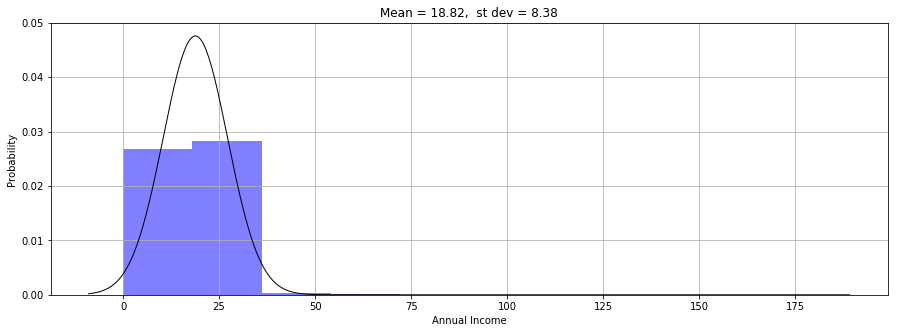

In [35]:
data = loan_data.dti

mu_dti, std_dti = norm.fit(data)
plt.figure(figsize=(15,5))
numOfBins = 10
n , dti_Bins, patches = plt.hist(data, bins=numOfBins, range=None, histtype='bar', 
                                        normed = True, align='mid',  log=False, color="Blue",
                                        alpha = .5, label="None", stacked=False)

# For overlaying normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu_dti, std_dti)
plt.plot(x, p, 'k', linewidth=1)
title = "Mean = %.2f,  st dev = %.2f" % (mu_dti, std_dti)
plt.title(title)
plt.grid(True)
plt.xlabel('Annual Income')
plt.ylabel('Probability')
# Overlaying mean, 68 percentile, 95 percentile and 99.7 percentiles
# percentileLines = [(mu-(2*std)), (mu-std), mu,(mu+std), (mu+(2*std))]


plt.savefig('Data/Graphs/histogram_dti_2.png')
plt.show()

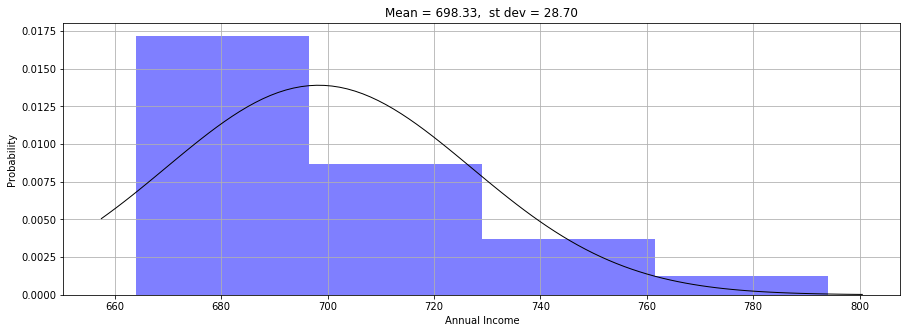

In [36]:
data = loan_data.fico_range_high

mu_fico_range_high, std_fico_range_high = norm.fit(data)
plt.figure(figsize=(15,5))
numOfBins = 4
n , fico_high_Bins, patches = plt.hist(data, bins=numOfBins, range=(None), histtype='bar', 
                                        normed = True, align='mid',  log=False, color="Blue",
                                        alpha = .5, label="None", stacked=False)

# For overlaying normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_fico_range_high, std_fico_range_high)
plt.plot(x, p, 'k', linewidth=1)
title = "Mean = %.2f,  st dev = %.2f" % (mu_fico_range_high, std_fico_range_high)
plt.title(title)
plt.grid(True)
plt.xlabel('Annual Income')
plt.ylabel('Probability')
# Overlaying mean, 68 percentile, 95 percentile and 99.7 percentiles
# percentileLines = [(mu-(2*std)), (mu-std), mu,(mu+std), (mu+(2*std))]


plt.savefig('Data/Graphs/histogram_fico_high_2.png')
plt.show()

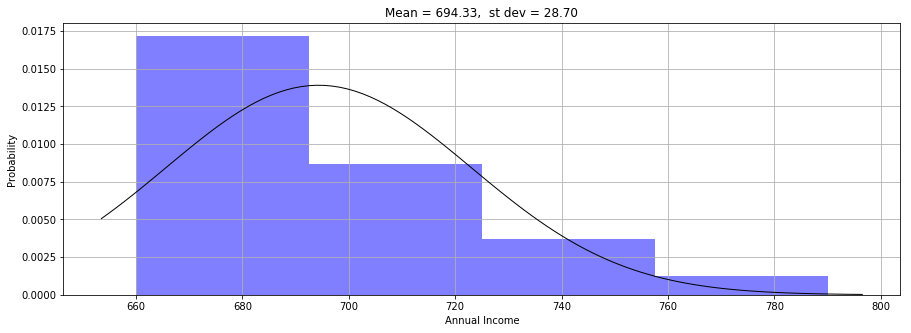

In [37]:
data = loan_data.fico_range_low

mu_fico_range_low, std_fico_range_low = norm.fit(data)
plt.figure(figsize=(15,5))
numOfBins = 4
n , fico_low_Bins, patches = plt.hist(data, bins=numOfBins, range=(None), histtype='bar', 
                                        normed = True, align='mid',  log=False, color="Blue",
                                        alpha = .5, label="None", stacked=False)

# For overlaying normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_fico_range_low, std_fico_range_low)
plt.plot(x, p, 'k', linewidth=1)
title = "Mean = %.2f,  st dev = %.2f" % (mu_fico_range_low, std_fico_range_low)
plt.title(title)
plt.grid(True)
plt.xlabel('Annual Income')
plt.ylabel('Probability')
# Overlaying mean, 68 percentile, 95 percentile and 99.7 percentiles
# percentileLines = [(mu-(2*std)), (mu-std), mu,(mu+std), (mu+(2*std))]


plt.savefig('Data/Graphs/histogram_fico_low_2.png')
plt.show()

In [38]:
loan_data[loan_data.columns[0:20]].describe()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status
count,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000
mean,14265.082498,1.242649,13.681815,6.032211,1.619950,79376.149604,1.844534,1.086592,15.828324,18.815390,0.372362,694.330736,698.330736,0.523584,11.924934,0.267300,15808.077397,50.453424,24.365614,1.280820
std,9205.793258,0.428687,4.942413,3.712651,0.680881,43757.344367,0.820168,1.930507,10.964647,8.382295,0.970525,28.700742,28.700742,0.816139,5.768157,0.668739,19243.957224,23.602583,11.901447,0.449402
min,1000.000000,1.000000,5.320000,0.000000,1.000000,5000.000000,1.000000,0.000000,0.000000,0.020000,0.000000,660.000000,664.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,7050.000000,1.000000,10.990000,3.000000,1.000000,50000.000000,1.000000,0.000000,7.000000,12.760000,0.000000,670.000000,674.000000,0.000000,8.000000,0.000000,6059.750000,32.500000,16.000000,1.000000
50%,12000.000000,1.000000,12.740000,6.000000,2.000000,70000.000000,2.000000,0.000000,14.000000,18.400000,0.000000,690.000000,694.000000,0.000000,11.000000,0.000000,11041.500000,49.900000,22.000000,1.000000
75%,20000.000000,1.000000,15.990000,10.000000,2.000000,97506.000000,3.000000,1.000000,23.000000,24.600000,0.000000,710.000000,714.000000,1.000000,15.000000,0.000000,19346.000000,68.200000,31.000000,2.000000
max,40000.000000,2.000000,30.990000,10.000000,4.000000,320000.000000,3.000000,12.000000,48.000000,180.200000,29.000000,790.000000,794.000000,5.000000,97.000000,24.000000,582313.000000,131.300000,137.000000,2.000000


In [39]:
loan_data[loan_data.columns[20:40]].describe()

,acc_now_delinq,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths
count,86244.000000,86244.00000,86244.000000,86244.000000,86244.000000,86244.000000,8.624400e+04,86244.000000,86244.000000,86244.000000,86244.000000,8.624400e+04,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000
mean,0.006482,1.00116,3.059645,0.700663,1.713139,20.008882,3.868596e+04,1.325136,2.775150,5745.129864,60.751473,3.248106e+04,1.012975,1.516963,2.130525,4.749467,13539.104123,10503.816938,58.506703,0.008059
std,0.087306,1.17594,3.147391,0.953399,1.636872,24.509974,4.461140e+04,1.502291,2.556505,5106.003016,19.427695,3.038984e+04,1.539226,2.677122,2.489195,3.262076,15205.536314,14811.540616,27.653357,0.103362
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,1.000000,0.000000,1.000000,7.000000,1.162100e+04,0.000000,1.000000,2475.000000,48.000000,1.440000e+04,0.000000,0.000000,0.000000,2.000000,3355.000000,1585.000000,36.900000,0.000000
50%,0.000000,1.00000,2.000000,0.000000,1.000000,13.000000,2.601000e+04,1.000000,2.000000,4472.000000,61.000000,2.450000e+04,0.000000,0.000000,1.000000,4.000000,7737.500000,5404.500000,60.000000,0.000000
75%,0.000000,2.00000,4.000000,1.000000,2.000000,22.000000,4.988525e+04,2.000000,4.000000,7409.000000,74.000000,4.100000e+04,1.000000,2.000000,3.000000,6.000000,18938.250000,13521.000000,82.900000,0.000000
max,6.000000,14.00000,45.000000,13.000000,20.000000,411.000000,1.044916e+06,26.000000,36.000000,226839.000000,172.000000,1.146300e+06,48.000000,44.000000,34.000000,45.000000,255710.000000,711140.000000,201.900000,7.000000


In [40]:
loan_data[loan_data.columns[40:60]].describe()

,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m
count,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000
mean,18.684314,126.525092,177.993773,13.763126,7.741733,1.486712,24.560422,0.604657,3.619336,5.495397,4.582893,7.347340,9.112506,8.140485,13.530912,5.507873,11.897303,0.001020,0.004255,0.095578
std,804.427885,52.916903,93.142724,17.301489,8.101167,1.791174,32.483611,1.505284,2.233333,3.196050,2.844135,4.475092,7.645917,4.687817,7.810371,3.200941,5.762906,0.032288,0.068565,0.572383
min,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,100.000000,117.000000,4.000000,3.000000,0.000000,6.000000,0.000000,2.000000,3.000000,3.000000,4.000000,4.000000,5.000000,8.000000,3.000000,8.000000,0.000000,0.000000,0.000000
50%,0.000000,130.000000,161.000000,8.000000,5.000000,1.000000,13.000000,0.000000,3.000000,5.000000,4.000000,6.000000,7.000000,7.000000,12.000000,5.000000,11.000000,0.000000,0.000000,0.000000
75%,0.000000,154.000000,227.000000,17.000000,10.000000,2.000000,29.000000,1.000000,5.000000,7.000000,6.000000,10.000000,12.000000,10.000000,17.000000,7.000000,15.000000,0.000000,0.000000,0.000000
max,65652.000000,515.000000,694.000000,280.000000,153.000000,61.000000,504.000000,51.000000,32.000000,43.000000,71.000000,79.000000,113.000000,91.000000,108.000000,43.000000,97.000000,2.000000,3.000000,29.000000


In [41]:
loan_data[loan_data.columns[60:70]].describe()

,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,outlier_flag
count,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,8.624400e+04,8.624400e+04,86244.000000,8.624400e+04,86244.0
mean,2.151779,93.200223,42.472141,0.147315,0.077339,1.800936e+05,5.491701e+04,21885.917861,4.854945e+04,0.0
std,1.892620,9.674524,36.230724,0.400586,0.446013,1.689259e+05,5.031993e+04,20809.320136,4.564167e+04,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+03,0.000000e+00,100.000000,0.000000e+00,0.0
25%,1.000000,90.000000,0.000000,0.000000,0.000000,5.472000e+04,2.353475e+04,8300.000000,1.938975e+04,0.0
50%,2.000000,96.700000,37.500000,0.000000,0.000000,1.189740e+05,4.112450e+04,15800.000000,3.698150e+04,0.0
75%,3.000000,100.000000,71.400000,0.000000,0.000000,2.612660e+05,6.937300e+04,28500.000000,6.445725e+04,0.0
max,29.000000,100.000000,100.000000,8.000000,24.000000,2.256941e+06,1.092321e+06,719500.000000,1.142229e+06,0.0


In [42]:
new_loan_data = loan_data[['loan_amnt','term','int_rate','emp_length','home_ownership','annual_inc','verification_status','purpose', 'dti', 'fico_range_low','fico_range_high']]

In [43]:
new_loan_data.describe()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,fico_range_low,fico_range_high
count,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000,86244.000000
mean,14265.082498,1.242649,13.681815,6.032211,1.619950,79376.149604,1.844534,1.086592,18.815390,694.330736,698.330736
std,9205.793258,0.428687,4.942413,3.712651,0.680881,43757.344367,0.820168,1.930507,8.382295,28.700742,28.700742
min,1000.000000,1.000000,5.320000,0.000000,1.000000,5000.000000,1.000000,0.000000,0.020000,660.000000,664.000000
25%,7050.000000,1.000000,10.990000,3.000000,1.000000,50000.000000,1.000000,0.000000,12.760000,670.000000,674.000000
50%,12000.000000,1.000000,12.740000,6.000000,2.000000,70000.000000,2.000000,0.000000,18.400000,690.000000,694.000000
75%,20000.000000,1.000000,15.990000,10.000000,2.000000,97506.000000,3.000000,1.000000,24.600000,710.000000,714.000000
max,40000.000000,2.000000,30.990000,10.000000,4.000000,320000.000000,3.000000,12.000000,180.200000,790.000000,794.000000


In [44]:
target = 'int_rate'
dependentVariables = ['loan_amnt','term','emp_length','home_ownership','annual_inc',
                      'verification_status','purpose', 'dti', 'fico_range_low','fico_range_high']

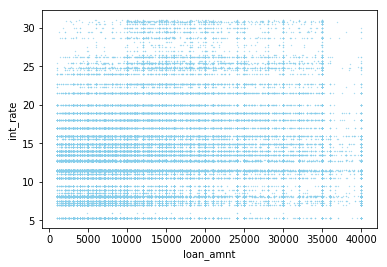

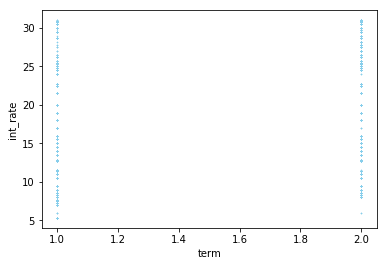

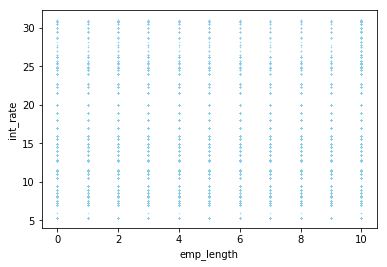

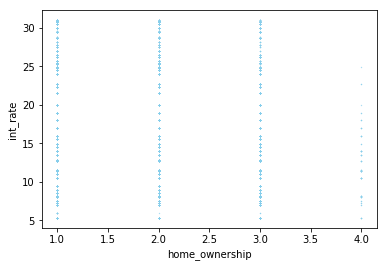

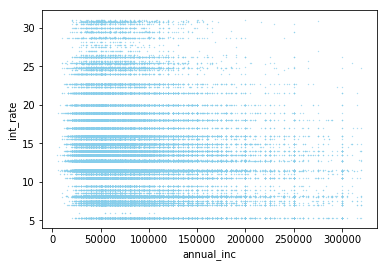

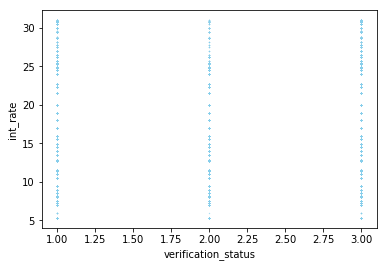

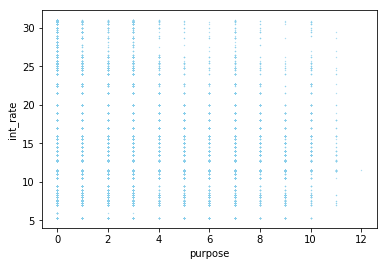

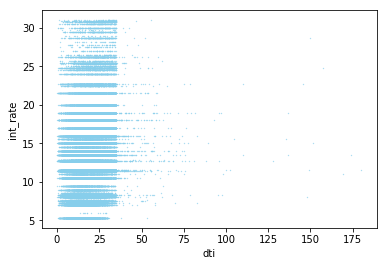

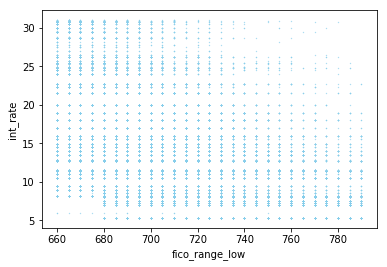

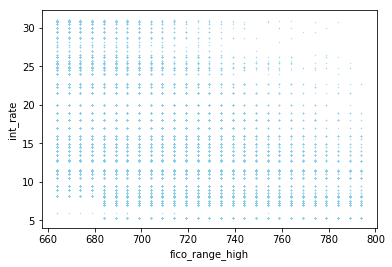

In [45]:
# Scatter Plots
import matplotlib.pyplot as plt


for col_name in dependentVariables:
    plt.scatter(new_loan_data[col_name],new_loan_data[target], color='Skyblue', s=.1)
    plt.xlabel( col_name )
    plt.ylabel(target)
    plt.savefig('Data/Graphs/scatterplot_int_rate_vs_' +  col_name   + '.png')
    plt.show()


In [ ]:
new_loan_data.to_csv("Data/new_loan_data_2016Q4-2.csv", header=True, index=False)
loan_data.to_csv("Data/loan_data_2016Q4-2.csv", header=True, index=False)

In [47]:
loanAmountBins

array([  1000.,   8800.,  16600.,  24400.,  32200.,  40000.])

In [48]:
annual_inc_Bins

array([   5000.,   50000.,   95000.,  140000.,  185000.,  230000.,
        275000.,  320000.])

In [49]:
dti_Bins

array([  2.00000000e-02,   1.80380000e+01,   3.60560000e+01,
         5.40740000e+01,   7.20920000e+01,   9.01100000e+01,
         1.08128000e+02,   1.26146000e+02,   1.44164000e+02,
         1.62182000e+02,   1.80200000e+02])

In [50]:
fico_high_Bins

array([ 664. ,  696.5,  729. ,  761.5,  794. ])

In [51]:
fico_low_Bins

array([ 660. ,  692.5,  725. ,  757.5,  790. ])